# To predict Diabetes Milletus 

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
data=pd.read_csv("dataset.csv.csv")

In [3]:
data.shape

(768, 9)

In [4]:
data.head(5)

,preg,plas,pres,Skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data

,preg,plas,pres,Skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
#Check if any null value is present
data.isnull().values.any()

False

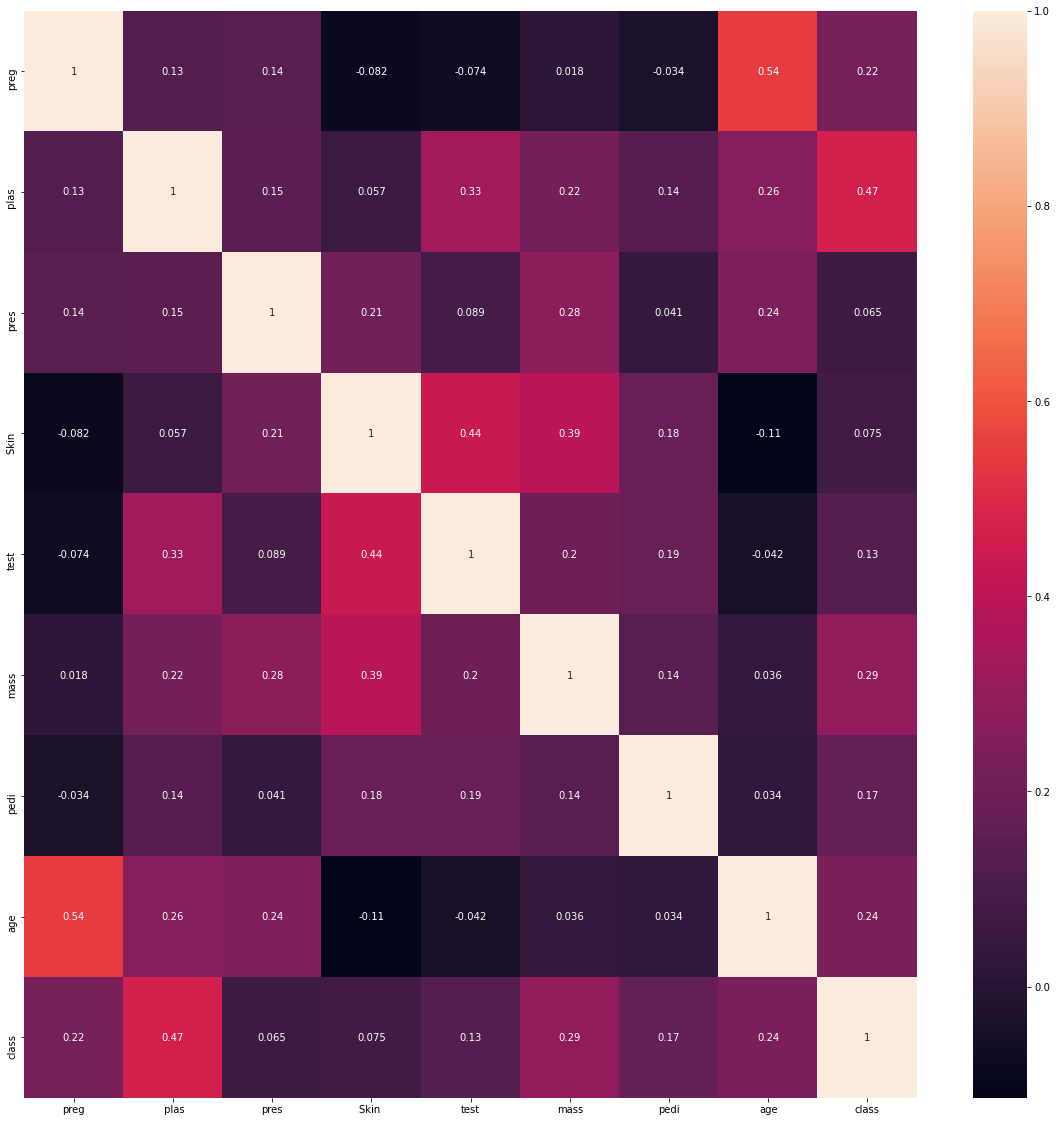

In [7]:
## Correlation
import seaborn as sns 
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True)

In [8]:
data.corr()

,preg,plas,pres,Skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
data.head(5)

,preg,plas,pres,Skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
class_true_count = len(data.loc[data['class'] == True])
class_false_count = len(data.loc[data['class'] == False])

In [11]:
(class_true_count,class_false_count)

(268, 500)

# Train Test Split

In [12]:
data.columns=['preg','plasma','pres','snow','test','mass','pedi','age','class']

In [13]:
from sklearn.model_selection import train_test_split
feature_columns = ['preg','plasma','pres','snow','test', 'mass', 'pedi', 'age']
predicted_class = ['class']

In [14]:
X=data.iloc[:,0:8].values
y=data.iloc[:,8].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

# Check how many other missing(zero) values

In [15]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing preg: {0}".format(len(data.loc[data['preg'] == 0])))
print("number of rows missing plasma: {0}".format(len(data.loc[data['plasma'] == 0])))
print("number of rows missing pres: {0}".format(len(data.loc[data['pres'] == 0])))
print("number of rows missing snow: {0}".format(len(data.loc[data['snow'] == 0])))
print("number of rows missing test: {0}".format(len(data.loc[data['test'] == 0])))
print("number of rows missing mass: {0}".format(len(data.loc[data['mass'] == 0])))
print("number of rows missing pedi: {0}".format(len(data.loc[data['pedi'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['age'] == 0])))


total number of rows : 768
number of rows missing preg: 111
number of rows missing plasma: 5
number of rows missing pres: 35
number of rows missing snow: 227
number of rows missing test: 374
number of rows missing mass: 11
number of rows missing pedi: 0
number of rows missing age: 0


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [17]:
ct=ColumnTransformer([("oh",OneHotEncoder(),[3])],remainder="passthrough")
X=ct.fit_transform(X)
X

<768x58 sparse matrix of type '<class 'numpy.float64'>'
	with 5608 stored elements in Compressed Sparse Row format>

In [18]:
X=X[:,0:8]
X

<768x8 sparse matrix of type '<class 'numpy.float64'>'
	with 266 stored elements in Compressed Sparse Row format>

In [24]:

## Apply Algorithm

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [34]:
predict_train_data = random_forest_model.predict(X_test)

## Apply Algorithm

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())
from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.749
